In [14]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_curve
from sklearn.preprocessing import StandardScaler

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# fetch dataset 
data = pd.read_csv("dataR2.csv")
  
# data (as pandas dataframes) 
X = data.drop(columns='Classification')
y = data['Classification']
  
print("Dataset shape:", data.shape)
print(data.head())

# transform {1,2} to {0,1}
y = y.map({1: 0, 2: 1})

Dataset shape: (116, 10)
   Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  Resistin  \
0   48  23.500000       70    2.707  0.467409   8.8071     9.702400   7.99585   
1   83  20.690495       92    3.115  0.706897   8.8438     5.429285   4.06405   
2   82  23.124670       91    4.498  1.009651  17.9393    22.432040   9.27715   
3   68  21.367521       77    3.226  0.612725   9.8827     7.169560  12.76600   
4   86  21.111111       92    3.549  0.805386   6.6994     4.819240  10.57635   

     MCP.1  Classification  
0  417.114               1  
1  468.786               1  
2  554.697               1  
3  928.220               1  
4  773.920               1  


# K-NN classifier 

### Cross-validation

In [4]:
print("Number of samples:", X.shape[0])
print("Number of features:", X.shape[1])

Number of samples: 116
Number of features: 9


Then d is small enough to insure that we are not in the curse of dimention

In [ ]:
k_scores = []
K_list = np.arange(1, X.shape[0] // 4 )  # concidering 1/4 of the samples as neaighbors is large enough for k-NN to don't overfit

# Cross-validation to find the best k

for k in K_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    k_scores.append(score.mean())

k_scores = np.array(k_scores)

print("The best k for k-NN is k =", np.argmax(k_scores))

The best k for k-NN is k = 22


Accuracy: 0.8
F1 Score: 0.798014888337469
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.71      0.77        17
           1       0.76      0.89      0.82        18

    accuracy                           0.80        35
   macro avg       0.81      0.80      0.80        35
weighted avg       0.81      0.80      0.80        35



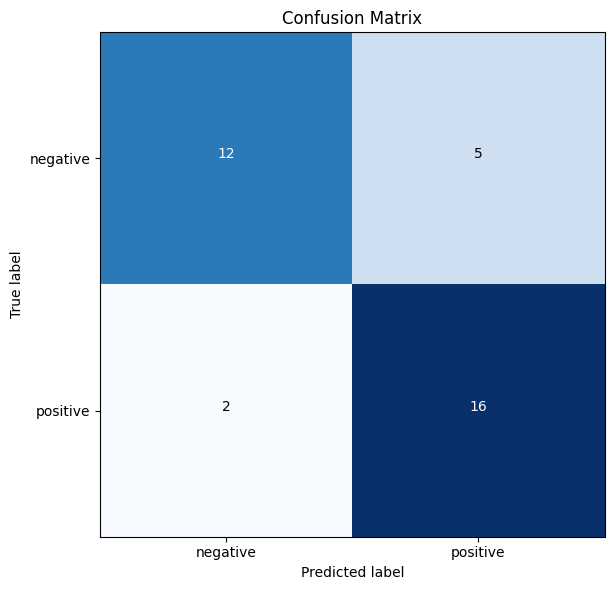

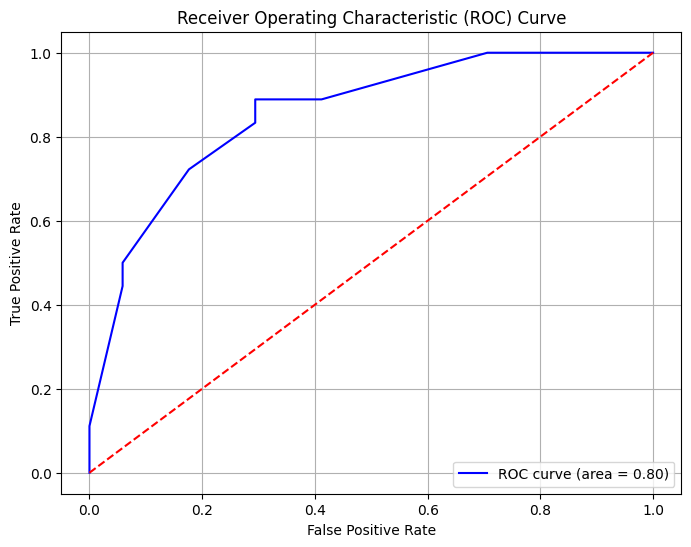

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=22) # using the best k found
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
class_report = classification_report(y_test, y_pred)

# Display differents performance of the model
print("Accuracy:", acc)
print("F1 Score:", f1)
print("Classification Report:\n", class_report)

# Plottinf the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], horizontalalignment='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')
plt.xticks(np.arange(len(np.unique(y))),labels = ["negative", "positive"])
plt.yticks(np.arange(len(np.unique(y))),labels = ["negative", "positive"])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

# Plotting ROC curve
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(f1))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()